> **Prices for BMW 3 series cars. R2 score: 0.9525**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('example.csv')
print('Dataset \n',data.head(3))
print('*************************************************')
print('Dataset Shape :',data.shape)
print('*************************************************')
print('Dataset Columns :\n',data.columns)

Dataset 
                     model  year fuelType   transmission  mileage   hp  \
0  520i Executive M Sport  2016   Benzin  Yarı Otomatik   136000  170   
1                   318is  1998   Benzin         Manuel   136000  140   
2         320d Sport Line  2012    Dizel  Yarı Otomatik   305000  184   

   engineSize   price  
0        1592  808000  
1        1796  240000  
2        1995  465000  
*************************************************
Dataset Shape : (904, 8)
*************************************************
Dataset Columns :
 Index(['model', 'year', 'fuelType', 'transmission', 'mileage', 'hp',
       'engineSize', 'price'],
      dtype='object')


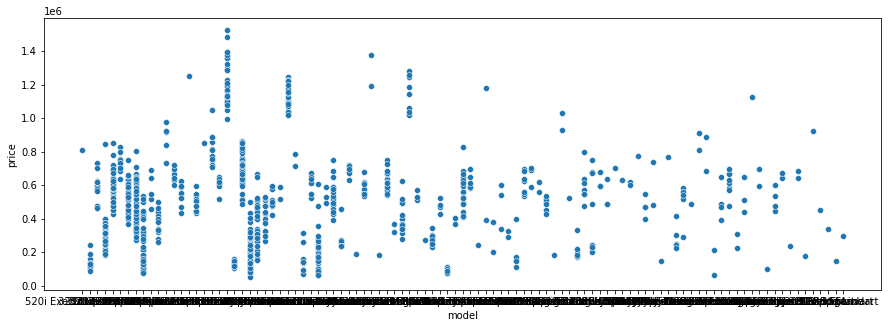

In [3]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='model',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='year',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='transmission',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='mileage',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='fuelType',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='hp',y='price',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='engineSize',y='price',data=data)
plt.show()

In [4]:
data.isnull().sum()

model           0
year            0
fuelType        0
transmission    0
mileage         0
hp              0
engineSize      0
price           0
dtype: int64

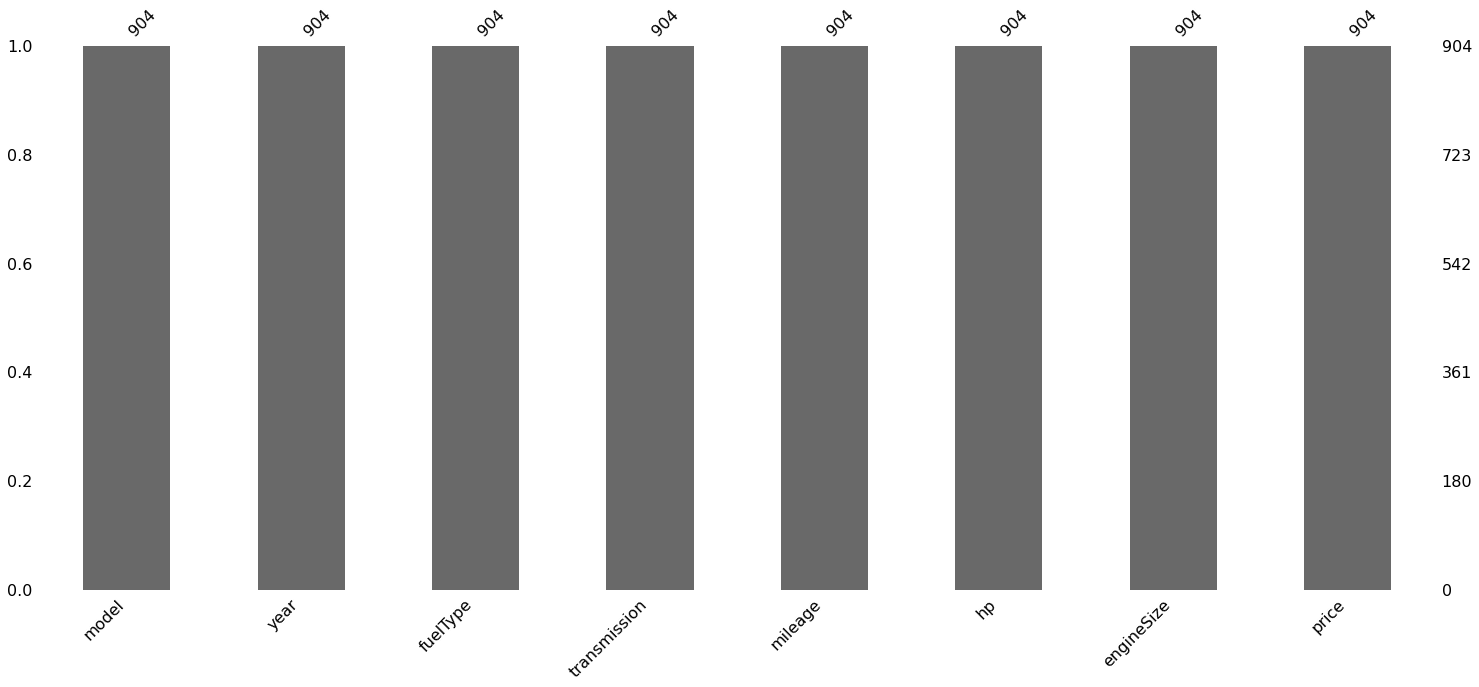

In [5]:
import missingno as msngo
msngo.bar(data)

In [6]:
num = data.select_dtypes('number').columns.to_list()
cat = data.select_dtypes('object').columns.to_list()

num_feature = data[num]
cat_feature = data[cat]

print('Num Feature',num_feature.columns)
print('***********************************************************************')
print('Cat Feature',cat_feature.columns)

Num Feature Index(['year', 'mileage', 'hp', 'engineSize', 'price'], dtype='object')
***********************************************************************
Cat Feature Index(['model', 'fuelType', 'transmission'], dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['model'] = le.fit_transform(data['model'])
data['transmission'] = data['transmission'].map({'Manuel':0,'Otomatik':1,'Yarı Otomatik':2})
data['fuelType'] = data['fuelType'].map({'Benzin':0,'Dizel':1,'Benzin & LPG':2})

In [8]:
data = pd.concat([data, pd.get_dummies(data['model'], prefix='model')], axis=1)
data = pd.concat([data, pd.get_dummies(data['transmission'], prefix='transmission')], axis=1)
data = pd.concat([data, pd.get_dummies(data['fuelType'], prefix='fuelType')], axis=1)

In [9]:
data = data.drop(['model','transmission','fuelType'],axis=1)

In [10]:
data

,year,mileage,hp,engineSize,price,model_0,model_1,model_2,model_3,model_4,...,model_97,model_98,model_99,model_100,transmission_0,transmission_1,transmission_2,fuelType_0,fuelType_1,fuelType_2
0,2016,136000,170,1592,808000,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1998,136000,140,1796,240000,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2012,305000,184,1995,465000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2010,165000,177,1995,397500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2007,245000,163,1900,292500,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2004,225000,213,2750,295000,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
900,2011,260000,184,1995,475000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
901,2019,41000,170,1597,995000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
902,2016,71000,138,1450,618500,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [11]:
y = data['price']
data = data.drop('price',axis=1,inplace=False)
X = data

In [12]:
import statsmodels.api as sm
model_OLS = sm.OLS(y, X).fit()
model_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     120.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:12:59   Log-Likelihood:                -11341.
No. Observations:                 904   AIC:                         2.290e+04
Df Residuals:                     796   BIC:                         2.342e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
year            1.446e+04    948.710     15.238      0.000    1.26e+04    1.63e+04
mileage           -0.4480      0.043    -10.312      0.000      -0.533      -0.363
hp               372.3528    312.895      1.190      0.234    -241.845     986.550
engineSize        -4.9783     22.228     -0.224      0.823     -48.610      38.654
model_0        -3.667e+05   7.54e+04     -4.862      0.000   -5.15e+05   -2.19e+05
model_1        -6.432e+05    7.9e+04     -8.139      0.000   -7.98e+05   -4.88e+05
model_2        -5.584e+05   3.68e+04    -15.176      0.000   -6.31e+05   -4.86e+05
model_3        -5.703e+05   4.67e+04    -12.200      0.000   -6.62e+05   -4.78e+05
model_4        -6.193e+05   6.35e+04     -9.749      0.000   -7.44e+05   -4.95e+05
model_5        -5.382e+05   4.81e+04    -11.187      0.000   -6.33e+05   -4.44e+05
model_6        -4.938e+05   3.53e+04    -13.992      0.000   -5.63e+05   -4.25e+05
model_7        -5.563e+05   4.77e+04    -11.652      0.000    -6.5e+05   -4.63e+05
model_8        -5.991e+05    4.4e+04    -13.631      0.000   -6.85e+05   -5.13e+05
model_9        -5.827e+05   7.76e+04     -7.512      0.000   -7.35e+05    -4.3e+05
model_10       -5.296e+05    4.2e+04    -12.603      0.000   -6.12e+05   -4.47e+05
model_11       -5.706e+05   3.29e+04    -17.321      0.000   -6.35e+05   -5.06e+05
model_12       -5.111e+05   4.86e+04    -10.510      0.000   -6.07e+05   -4.16e+05
model_13       -5.083e+05    5.2e+04     -9.781      0.000    -6.1e+05   -4.06e+05
model_14       -6.638e+05   4.16e+04    -15.949      0.000   -7.45e+05   -5.82e+05
model_15       -5.675e+05   3.99e+04    -14.206      0.000   -6.46e+05   -4.89e+05
model_16        -2.14e+05   6.05e+04     -3.535      0.000   -3.33e+05   -9.52e+04
model_17       -5.272e+05   5.75e+04     -9.175      0.000    -6.4e+05   -4.14e+05
model_18       -3.266e+05   5.33e+04     -6.127      0.000   -4.31e+05   -2.22e+05
model_19       -3.073e+05   7.84e+04     -3.919      0.000   -4.61e+05   -1.53e+05
model_20       -3.175e+05   7.98e+04     -3.981      0.000   -4.74e+05   -1.61e+05
model_21       -3.288e+05   6.21e+04     -5.292      0.000   -4.51e+05   -2.07e+05
model_22       -3.633e+05   4.26e+04     -8.530      0.000   -4.47e+05    -2.8e+05
model_23       -4.243e+05   4.62e+04     -9.177      0.000   -5.15e+05   -3.34e+05
model_24       -4.864e+05   7.93e+04     -6.132      0.000   -6.42e+05   -3.31e+05
model_25       -4.579e+05   4.34e+04    -10.563      0.000   -5.43e+05   -3.73e+05
model_26       -4.828e+05   4.18e+04    -11.558      0.000   -5.65e+05   -4.01e+05
model_27       -4.225e+05   4.52e+04     -9.343      0.000   -5.11e+05   -3.34e+05
model_28       -4.736e+05   4.41e+04    -10.745      0.000    -5.6e+05   -3.87e+05
model_29       -4.246e+05   6.18e+04     -6.869      0.000   -5.46e+05   -3.03e+05
model_30    

In [13]:
p_value = pd.DataFrame(model_OLS.pvalues, columns = ['pvalues'])
p_value = p_value.style.format({'pvalues': '{:.7f}'})

In [14]:
p_value

,pvalues
year,0.0000000
mileage,0.0000000
hp,0.2343920
engineSize,0.8228393
model_0,0.0000014
model_1,0.0000000
model_2,0.0000000
model_3,0.0000000
model_4,0.0000000
model_5,0.0000000


In [16]:
data = data.drop(['engineSize', 'hp'],axis=1)

In [17]:
X = data

In [18]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    Cross_Validation1 = cross_validate(model, X, y, cv=5, return_train_score=True)
    CrossValidateValues2 = cross_validate(model,X,y,cv=5,scoring=('r2','neg_mean_squared_error'),return_train_score = True)

    print('Train Score Value : ', Cross_Validation1['train_score'])
    print('Test Score Value : ', Cross_Validation1['test_score'])
    print('*********************************************************************************************')
    print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
    print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
    print('*********************************************************************************************')
    print('Train R2 Value : ', CrossValidateValues2['train_r2'])
    print('Test R2 Value : ', CrossValidateValues2['test_r2'])
    print('*********************************************************************************************')

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    cv_score = np.abs(np.mean(cv_score))
    print("CV Mean Square Errors [MSE] :", cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))
    print("CV R2 :", np.mean(cv_score_r2))
    print('*********************************************************************************************')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred) 
    print('Mean Absolute Error Value in Model is : ', MAE)

    MSE = mean_squared_error(y_test, y_pred) 
    print('Mean Squared Error Value in Model is : ', MSE)
    
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value in Model is : ',RMSE)

    r2 = r2_score(y_test,y_pred)
    print('R2 Value in Model is : ',r2)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr, X, y)

Train Score Value :  [0.94576244 0.94293251 0.94317341 0.94589434 0.94169376]
Test Score Value :  [ 8.71386480e-01  9.16852428e-01 -9.56842837e+09  9.00184604e-01
  9.26624687e-01]
*********************************************************************************************
Train MSE Value :  [-4.25992173e+09 -4.65426272e+09 -4.40589419e+09 -4.30100384e+09
 -4.69057958e+09]
Test MSE Value :  [-1.07605092e+10 -5.91490971e+09 -8.38893295e+20 -7.81882613e+09
 -5.33350782e+09]
*********************************************************************************************
Train R2 Value :  [0.94576244 0.94293251 0.94317341 0.94589434 0.94169376]
Test R2 Value :  [ 8.71386480e-01  9.16852428e-01 -9.56842837e+09  9.00184604e-01
  9.26624687e-01]
*********************************************************************************************
CV Mean Square Errors [MSE] : 1.6777865905298702e+20
CV Root Mean Square Errors [RMSE] : 12952940170.20796
CV R2 : -1913685673.461041
*************************

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
train(dt, X, y)

Train Score Value :  [0.97949309 0.979413   0.97552201 0.97746554 0.97560993]
Test Score Value :  [0.89876557 0.91800029 0.94128691 0.89078681 0.93700877]
*********************************************************************************************
Train MSE Value :  [-1.61065206e+09 -1.67901733e+09 -1.89783374e+09 -1.79132434e+09
 -1.96211492e+09]
Test MSE Value :  [-8.47413471e+09 -5.81718470e+09 -5.20160699e+09 -8.52680305e+09
 -4.48423130e+09]
*********************************************************************************************
Train R2 Value :  [0.97949309 0.979413   0.97552201 0.97746554 0.97560993]
Test R2 Value :  [0.89871406 0.91822618 0.9406704  0.89114655 0.93830854]
*********************************************************************************************
CV Mean Square Errors [MSE] : 6302369533.293371
CV Root Mean Square Errors [RMSE] : 79387.46458536998
CV R2 : 0.9180856888721765
**********************************************************************************

In [21]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=10,n_estimators=40,min_samples_split=12)
train(rf, X, y)

Train Score Value :  [0.97365187 0.97333246 0.96900615 0.97291925 0.97046456]
Test Score Value :  [0.9271174  0.93537899 0.95896063 0.92218344 0.95209301]
*********************************************************************************************
Train MSE Value :  [-2.08563825e+09 -2.16809086e+09 -2.44229018e+09 -2.03666748e+09
 -2.38142164e+09]
Test MSE Value :  [-6.06074810e+09 -4.53191323e+09 -3.80486761e+09 -5.92701624e+09
 -3.48212562e+09]
*********************************************************************************************
Train R2 Value :  [0.97344554 0.9734163  0.96849969 0.97437918 0.97039774]
Test R2 Value :  [0.92755973 0.9362936  0.95660163 0.92433551 0.95209493]
*********************************************************************************************
CV Mean Square Errors [MSE] : 4782372369.74703
CV Root Mean Square Errors [RMSE] : 69154.69882623327
CV R2 : 0.9398529038778822
***********************************************************************************

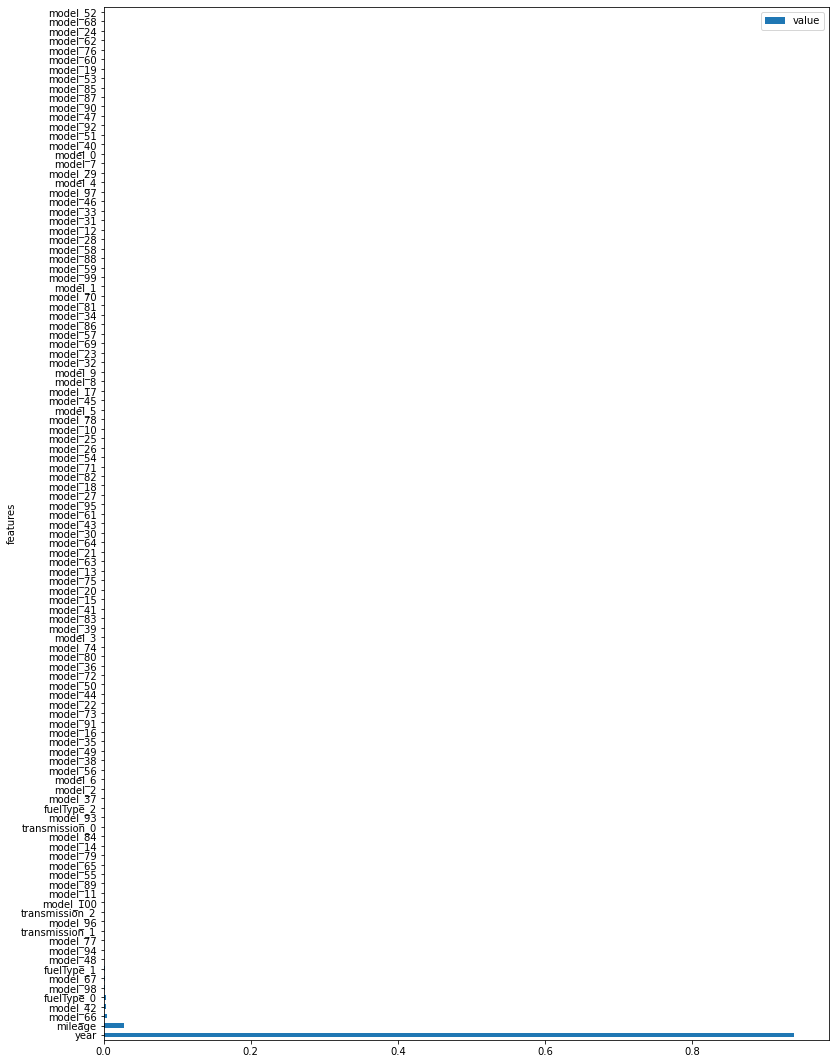

In [24]:
feat_import = pd.DataFrame(rf.feature_importances_, columns = ['value'])
features = pd.DataFrame(X.columns, columns = ['features'])
feat_import = pd.concat([features, feat_import], axis=1)
feat_import.sort_values('value', ascending=False, inplace=True)
feat_import.plot.barh(x ='features', figsize=(13, 19))